In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Load Data
data_path = '/Users/chetan/Documents/GitHub/nj_transit_data_ru_hack/data/rail_data/2020_05.csv'  # Update to your data path
df = pd.read_csv(data_path)

# Display the first few rows of the data
print("Train Schedule Data:")
print(df.head())

# Step 2: Data Preprocessing
# Convert date columns to datetime format
df['scheduled_time'] = pd.to_datetime(df['scheduled_time'])
df['actual_time'] = pd.to_datetime(df['actual_time'])

# Calculate delay in minutes if not already in minutes
df['delay_minutes'] = df['delay_minutes'].fillna(0)  # Fill NaN with 0 for delays

# Extract additional time features
df['hour_of_day'] = df['scheduled_time'].dt.hour
df['day_of_week'] = df['scheduled_time'].dt.dayofweek

# Step 3: Prepare Features and Target


'''for col in ['from_id', 'to_id']:
    freq = df[col].value_counts() / len(df)
    df[col + '_freq_encoded'] = df[col].map(freq)

# Drop the original columns if needed
df = df.drop(columns=['from_id', 'to_id'])
features = ['hour_of_day', 'day_of_week', 'train_id', 'from_id_freq_encoded', 'to_id_freq_encoded']  # Select relevant features'''
features = ['hour_of_day', 'day_of_week', 'train_id', 'from_id', 'to_id']  # Select relevant features
target = 'delay_minutes'  # We want to predict delay minutes

# Prepare data for training
X = df[features]
y = df[target]

# Check for NaN values and drop them if necessary
X = X.dropna()
y = y[X.index]  # Ensure target matches features
print(X.head())


Train Schedule Data:
         date train_id  stop_sequence                 from  from_id  \
0  2020-05-01     5543            1.0  Newark Penn Station      107   
1  2020-05-01     5543            2.0  Newark Penn Station      107   
2  2020-05-01     5543            3.0                Union    38105   
3  2020-05-01     5543            4.0         Roselle Park       31   
4  2020-05-01     5543            5.0             Cranford       32   

                    to  to_id       scheduled_time          actual_time  \
0  Newark Penn Station    107  2020-05-01 23:38:00  2020-05-01 23:40:09   
1                Union  38105  2020-05-01 23:47:00  2020-05-01 23:47:01   
2         Roselle Park     31  2020-05-01 23:50:00  2020-05-01 23:51:04   
3             Cranford     32  2020-05-01 23:55:00  2020-05-01 23:55:31   
4            Westfield    155  2020-05-01 23:59:00  2020-05-01 23:59:01   

   delay_minutes    status            line        type  
0       2.150000  departed  Raritan Valley  

In [26]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [27]:
# Step 5: Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [28]:
# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")




Model Performance:
Mean Absolute Error (MAE): 1.63 minutes
Root Mean Squared Error (RMSE): 3.60 minutes


In [29]:
# Step 7: Prediction Function
def predict_delay(hour_of_day, day_of_week, train_id, from_id, to_id):
    # Create a feature vector
    input_data = pd.DataFrame([{
        'hour_of_day': hour_of_day,
        'day_of_week': day_of_week,
        'train_id': train_id,
        'from_id': from_id,
        'to_id': to_id
    }])

    
    # Align the input data with the training data columns
    for column in X.columns:
        if column not in input_data.columns:
            input_data[column] = 0  # Add missing columns with default value 0
    
    input_data = input_data[X.columns]  # Align column order

    # Predict delay
    predicted_delay = model.predict(input_data)[0]
    return predicted_delay



In [30]:
# Example prediction
predicted = predict_delay(18, 6, 3805, 105, 31)  # Example values
print(f"\nPredicted Delay (minutes): {predicted:.2f}")


Predicted Delay (minutes): 1.79


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data
data_path = '/Users/chetan/Documents/GitHub/nj_transit_data_ru_hack/data/RAIL_CANCELLATIONS_DATA.csv'
df = pd.read_csv(data_path)

df.head()

,YEAR,MONTH,CATEGORY,CANCEL_COUNT,CANCEL_TOTAL,CANCEL_PERCENTAGE
0,2017,APRIL,AMTRAK ...,391,525,74.5
1,2017,APRIL,Carryover/Other ...,54,525,10.3
2,2017,APRIL,Crew/Engineer Availability ...,10,525,1.9
3,2017,APRIL,Equipment Availability ...,3,525,0.6
4,2017,APRIL,Human Factor ...,7,525,1.3


   YEAR            MONTH                                           CATEGORY  \
0  2017  APRIL            AMTRAK                                        ...   
1  2017  APRIL            Carryover/Other                               ...   
2  2017  APRIL            Crew/Engineer Availability                    ...   
3  2017  APRIL            Equipment Availability                        ...   
4  2017  APRIL            Human Factor                                  ...   

   CANCEL_COUNT  CANCEL_TOTAL  CANCEL_PERCENTAGE  
0           391           525               74.5  
1            54           525               10.3  
2            10           525                1.9  
3             3           525                0.6  
4             7           525                1.3  

Monthly Aggregation:
     YEAR            MONTH  total_cancel_count  avg_cancel_percentage
0   2017  APRIL                           525              10.000000
1   2017  AUGUST                          413             

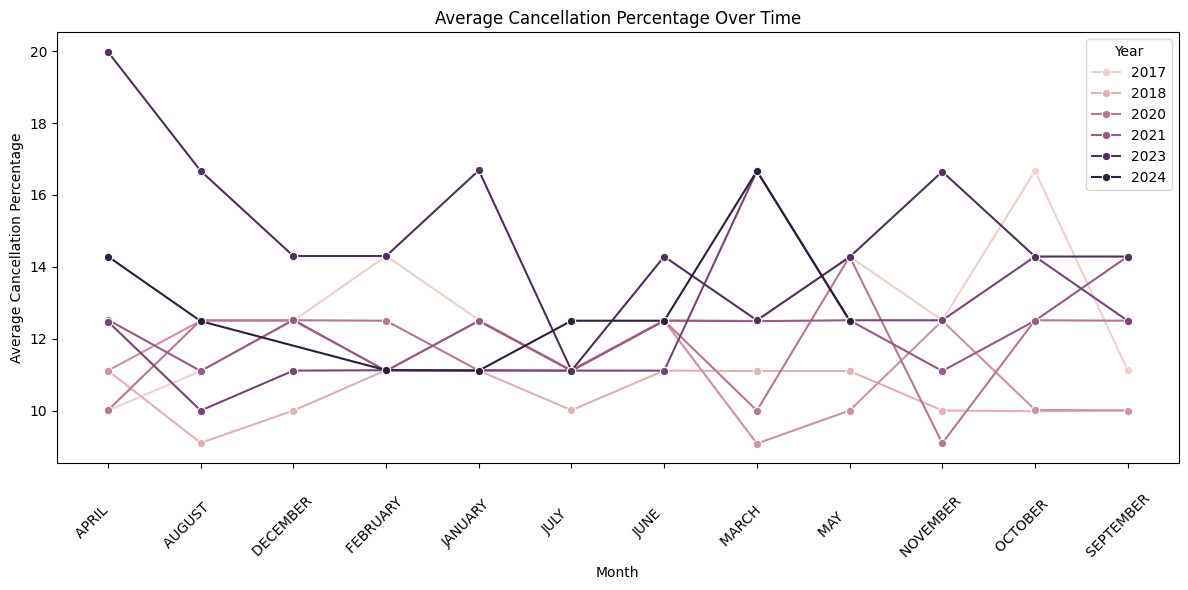

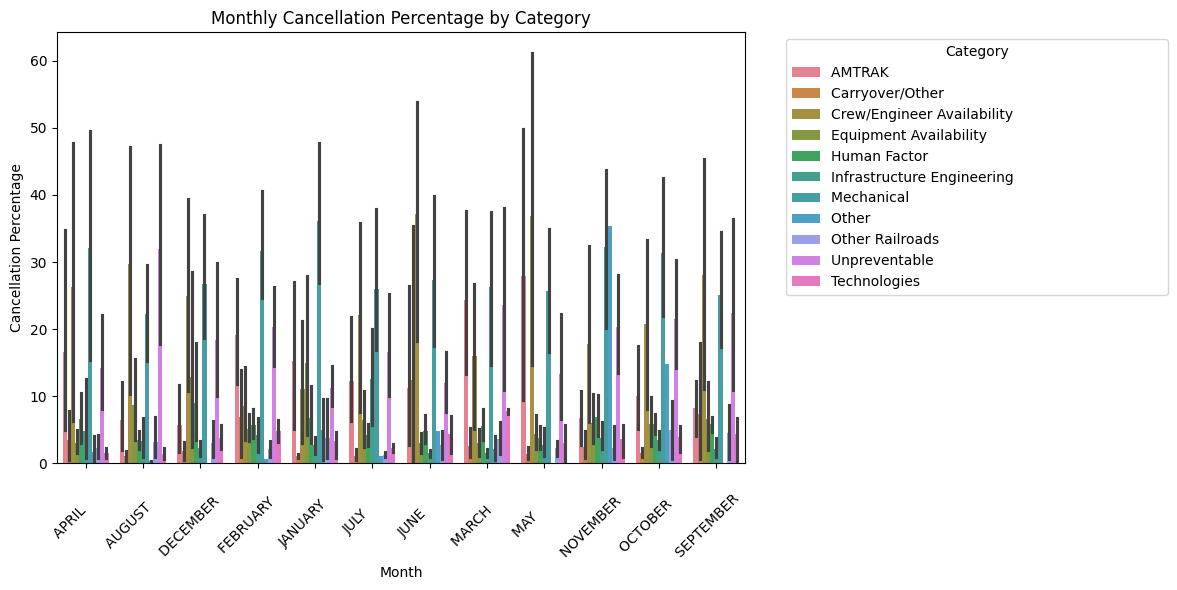

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data, skipping the first row
data_path = '/Users/chetan/Documents/GitHub/nj_transit_data_ru_hack/data/RAIL_CANCELLATIONS_DATA.csv'

# Clean up the data
df['CANCEL_PERCENTAGE'] = df['CANCEL_PERCENTAGE'].astype(float)
df['CANCEL_COUNT'] = df['CANCEL_COUNT'].astype(int)
df['CANCEL_TOTAL'] = df['CANCEL_TOTAL'].astype(int)

# Print first few rows to confirm data is loaded correctly
print(df.head())

# Step 2: Aggregate by Month and Year
monthly_agg = df.groupby(['YEAR', 'MONTH']).agg(
    total_cancel_count=('CANCEL_COUNT', 'sum'),
    avg_cancel_percentage=('CANCEL_PERCENTAGE', 'mean')
).reset_index()
print("\nMonthly Aggregation:\n", monthly_agg)

# Step 3: Category Contribution Analysis
category_contrib = df.groupby(['YEAR', 'MONTH', 'CATEGORY']).agg(
    cancel_count=('CANCEL_COUNT', 'sum'),
    cancel_percentage=('CANCEL_PERCENTAGE', 'mean')
).reset_index()

# Identify top contributing categories for each month-year combination
top_categories = category_contrib.sort_values(by=['YEAR', 'MONTH', 'cancel_percentage'], ascending=[True, True, False])
print("\nTop Categories by Month-Year:\n", top_categories.groupby(['YEAR', 'MONTH']).head(1))

# Step 4: Time-Series Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_agg, x='MONTH', y='avg_cancel_percentage', hue='YEAR', marker='o')
plt.title('Average Cancellation Percentage Over Time')
plt.ylabel('Average Cancellation Percentage')
plt.xlabel('Month')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Step 5: Comparative Analysis Between Categories
plt.figure(figsize=(12, 6))
sns.barplot(data=category_contrib, x='MONTH', y='cancel_percentage', hue='CATEGORY')
plt.title('Monthly Cancellation Percentage by Category')
plt.ylabel('Cancellation Percentage')
plt.xlabel('Month')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [45]:
# Load the data
data_path = '/Users/chetan/Documents/GitHub/nj_transit_data_ru_hack/data/rail_data/2020_05.csv'
df = pd.read_csv(data_path)

# Create a dictionary mapping "from" stations to their "from_id"
from_station_id = df[['from', 'from_id']].drop_duplicates().set_index('from')['from_id'].to_dict()
to_station_id = df[['to', 'to_id']].drop_duplicates().set_index('to')['to_id'].to_dict()

In [47]:
train_id = df['train_id'].unique()

In [48]:
train_id 

array(['5543', '7825', 'A94', '4234', '7822', '7225', 'A56', '2101',
       '4202', '8404', '7814', '6932', '8890', 'A51', '6935', '7813',
       '7847', '7249', '4635', '1723', '7276', '5521', '5519', '7840',
       'A138', '5526', '4256', '1724', '4632', '7849', '5510', '4260',
       '1712', '7885', '4258', '7871', '5528', '1715', '5517', '7240',
       '7624', '2107', '4204', '7812', '6934', '7224', '6933', '4651',
       'A95', '7212', '8433', '4232', 'A92', '7824', '5529', '5516',
       '7241', '7625', '4266', '7877', '5511', '8800', '7848', '7841',
       '5518', '1725', '4633', '7248', '7846', '7879', '7277', '5520',
       '4634', '4250', '0544', '9608', '4777', '4748', '0740', 'A2158',
       '9606', '8512', '1867', '0519', '1858', '4724', '0714', '0526',
       '1090', '0713', '0984', '1856', '0725', '4527', '9200', '0983',
       '0722', '0510', '0741', '4785', '9600', '4740', '0545', '0982',
       '0723', '0985', '1857', '0724', '8911', '0712', '0518', '1866',
       '05